<br>
<font>
<div dir=ltr align=center>
<br>
<font color=0F5298 size=7>
Diagonalization, Eigenvectors and Decomposition <br>



<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [62]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [63]:
def compute_eigenvalues(A):
    """
    Computes and returns a list of eigenvalues of the input matrix A.

    Args:
    A (numpy.ndarray): The input matrix for which eigenvalues are computed.

    Returns:
    eigenvalues (list): A list containing the eigenvalues of matrix A.
    """
    col_sum =  (A[0,0] + A[1,1])
    det = (A[0,0] * A[1,1] - (A[0,1]* A[1,0]))
    delta = col_sum**2 - 4*det
    eigenvalues = [(col_sum + np.sqrt(delta)) / 2, (col_sum - np.sqrt(delta)) / 2]
    return eigenvalues

    pass

def compute_eigenvector(matrix, eigenvalue):
    """
    Computes the eigenvector corresponding to the given eigenvalue of matrix A.

    Args:
    - A (numpy.ndarray): The square matrix.
    - eigenvalue (float or complex): The eigenvalue for which the eigenvector is computed.

    Returns:
    - eigenvector (numpy.ndarray): The eigenvector corresponding to the input eigenvalue.
    """
    dim = matrix.shape[0]
    identity_matrix = np.eye(dim)
    adjusted_matrix = matrix - eigenvalue * identity_matrix

    eigenvector = np.zeros(dim)

    if adjusted_matrix[0, 1] != 0:
        eigenvector[0] = 1
        eigenvector[1] = -adjusted_matrix[0, 0] / adjusted_matrix[0, 1]
    elif adjusted_matrix[1, 0] != 0:
        eigenvector[0] = 1
        eigenvector[1] = -adjusted_matrix[1, 1] / adjusted_matrix[1, 0]
    else:
        return None

    return eigenvector

    pass

def compute_eigenvectors(A):
    """
    Computes the eigenvectors of the matrix A.

    Args:
    - A (numpy.ndarray): The square matrix for which eigenvectors are computed.

    Returns:
    - eigenvectors (list of numpy.ndarray): A list containing the eigenvectors of matrix A.
    """
    eigenvalues = compute_eigenvalues(A)
    eigenvectors_list = []

    # Compute the eigenvectors for each eigenvalue
    for value in eigenvalues:
        eigenvector = compute_eigenvector(A, value)
        eigenvectors_list.append(eigenvector)

    return np.transpose(eigenvectors_list)

    pass


<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [64]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

In [65]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

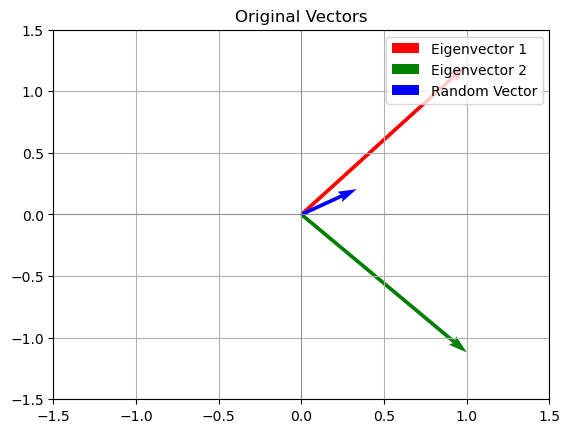

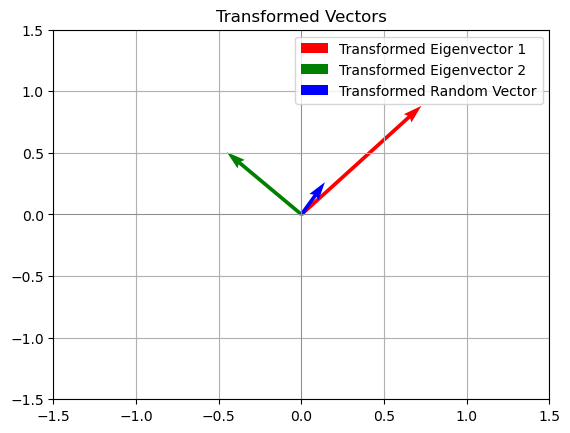

In [66]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[:, 0], eigenvectors[:, 1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[:, 0], A @ eigenvectors[:, 1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

Eigenvectors are special vectors that, when transformed by the matrix
𝐴
A, only get scaled and do not change their direction (red vector). Other vectors may change both in magnitude and direction.

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [67]:
def diagonalize(A):
    """
    Diagonalizes the square matrix A if possible using eigenvectors.

    Args:
    - A (numpy.ndarray): The square matrix to be diagonalized.

    Returns:
    - diagonal_matrix (numpy.ndarray): The diagonal matrix D such that A = PDP^-1,
      where D is diagonal and P is the matrix of eigenvectors.

    Attempts to diagonalize the input square matrix A using eigenvectors.
    Returns the diagonal matrix D. You are allowed to use numpy.linalg.inv(P) to compute P^-1.
    """

    eigen_values = compute_eigenvalues(A)
    eigen_vectors = compute_eigenvectors(A)

    P = np.array(eigen_vectors).T
    P_prime = np.linalg.inv(P)
    D = np.diag(eigen_values)

    return P,D,P_prime


In [68]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [69]:
A = generate_valid_matrix()
P,D,P_prime = diagonalize(A)

check_diagonalization(D, A)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

we can speed up the process of calculating powers of a matrix by using diagonalization.

Diagonalization is a technique that involves expressing a matrix A as a product of three matrices: D, P, and P^(-1), where D is a diagonal matrix containing the eigenvalues of A, and P is a matrix with the eigenvectors of A as columns. This representation allows us to simplify the calculation of powers of A by using the formula A^n = PD^nP^(-1), which reduces the computational complexity and speeds up the process, particularly for large matrices or high powers.

<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [70]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [71]:
n_values = range(1, 200)

In [72]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [73]:
def compute_powers_your_way(A, n):

    P, D, P_prime = diagonalize(A)
    D_Npowered = np.diag(np.diagonal(D) ** n)

    """
    Computes the power of a square matrix A to the nth degree.

    Args:
    - A (numpy.ndarray): The square matrix for which powers are computed.
    - n (int): The exponent to which A is raised.

    Returns:
    - result (numpy.ndarray): The matrix A raised to the power of n.

    """
    return P @ D_Npowered @ P_prime
    pass

In [74]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

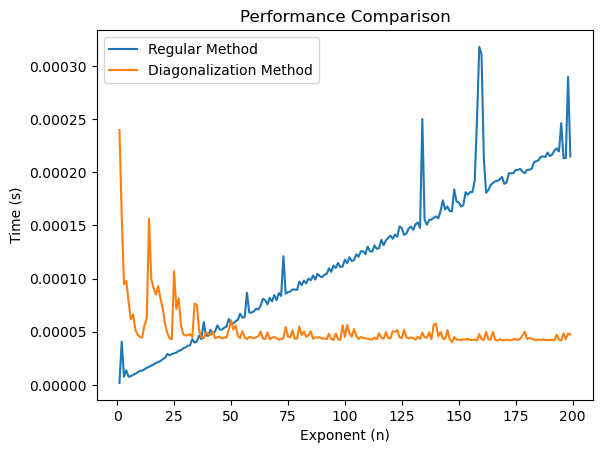

In [75]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**QR decompostion step by step :**

In [76]:
def gram_schmidt(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    R = np.zeros((m, m))

    for i in range(m):
        v = A[:, i]

        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            v = v - R[j, i] * Q[:, j]


        R[i, i] = np.linalg.norm(v)
        Q[:, i] = v / R[i, i]

    return Q, R


Now, let's check if the decompostion.

In [77]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    Q, R = gram_schmidt(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.6564102  0.65423037 0.72810937 0.8190777 ]
 [0.11591113 0.51139461 0.88876004 0.05218884]
 [0.54684614 0.33131713 0.98037294 0.28063752]
 [0.71466129 0.27198314 0.35151661 0.51149335]]

Orthogonal matrix Q:
[[ 0.58615268  0.38307564 -0.51052753  0.4990388 ]
 [ 0.10350482  0.81891161  0.22890555 -0.51601625]
 [ 0.48831559 -0.08644304  0.80764525  0.31903703]
 [ 0.63816899 -0.41852649 -0.18620698 -0.61879146]]

Upper triangular matrix R:
[[ 1.11986214  0.77176922  1.2218326   0.94896526]
 [ 0.          0.5269345   0.77487145  0.11817408]
 [ 0.          0.          0.55806094 -0.27480347]
 [ 0.          0.          0.          0.15484731]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [78]:
def householder_reflection(a):
    v = a.copy()
    v[0] += np.sign(a[0]) * np.linalg.norm(a)
    v = v / np.linalg.norm(v)

    H = np.eye(a.shape[0]) - 2 * np.outer(v, v)
    return H

def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        x = R[i:, i]

        H_i = np.eye(m)
        H = householder_reflection(x)
        H_i[i:, i:] = H

        R = H_i @ R
        Q = Q @ H_i

    return Q, R

Check the decompostion.


In [79]:
test_QR_decomposition()

Matrix A:
[[0.11606108 0.79703564 0.33980997 0.28426453]
 [0.53418423 0.25687137 0.24929575 0.52624964]
 [0.36726606 0.42148913 0.46993458 0.37520707]
 [0.34665394 0.81681318 0.74237325 0.11422504]]

Orthogonal matrix Q:
[[ 0.15594815  0.76325879 -0.60319781  0.17108067]
 [ 0.71776898 -0.44957468 -0.45927675 -0.26787156]
 [ 0.49348552 -0.02466187  0.32507507  0.80634362]
 [ 0.46578957  0.46336856  0.56528176 -0.49878472]]

Upper triangular matrix R:
[[ 0.74422865  0.89713236  0.80962512  0.66042028]
 [ 0.          0.86095243  0.47968885  0.02405387]
 [ 0.          0.          0.2529457  -0.22662217]
 [ 0.          0.          0.          0.15323697]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [80]:
def qr_householder(A):
    m, n = A.shape
    Q_total = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        x = R[i:, i]
        H_i = np.eye(m)
        H = householder_reflection(x)
        H_i[i:, i:] = H

        R = H_i @ R
        Q_total = Q_total @ H_i

    return Q_total, R

def householder_reflection(a):
    v = a.copy()
    v[0] += np.sign(a[0]) * np.linalg.norm(a)
    v = v / np.linalg.norm(v)

    H = np.eye(a.shape[0]) - 2 * np.outer(v, v)
    return H

def qr_algorithm(A, num_iterations=100000, tol=1e-10):
    A = A.copy()
    m, n = A.shape
    Q_total = np.eye(m)

    for _ in range(num_iterations):
        Q, R = qr_householder(A)
        A = R @ Q
        Q_total = Q_total @ Q

        off_diagonal = np.sqrt(np.sum(np.tril(A, -1)**2))
        if off_diagonal < tol:
            break

    eigenvalues = np.diag(A)
    return eigenvalues, Q_total

def compute_eigenvectors(A, eigenvalues):
    n = A.shape[0]
    eigenvectors = np.zeros((n, n))

    for i, eigenvalue in enumerate(eigenvalues):
        I = np.eye(n)
        A_shifted = A - eigenvalue * I
        _, _, vh = np.linalg.svd(A_shifted)
        eigenvectors[:, i] = vh[-1, :]

    return eigenvectors

Now we verify our results. 

In [81]:
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)

    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)

    # Verify the results
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, eigenvectors @ np.diag(eigenvalues)))

    # Compare with NumPy's eig function
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real

    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)

    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)

    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(np_eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.93609089 0.46687172 0.58174818 0.52255084]
 [0.16643936 0.53956825 0.32509303 0.65019906]
 [0.82067678 0.17089197 0.79089464 0.07105367]
 [0.56254232 0.94403926 0.09804098 0.27069575]]

Eigenvalues (QR Algorithm):
[ 2.02154771  0.74466998 -0.4677826   0.23881444]

Eigenvectors (QR Algorithm):
[[-0.6425704  -0.08394289  0.18248912 -0.51872984]
 [-0.37477775  0.39021446  0.53928003  0.24401901]
 [-0.50577138 -0.75406581 -0.14653819  0.74066544]
 [-0.43685263  0.52160427 -0.80895076 -0.35041231]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 2.02154771 -0.4677826   0.23881444  0.74466998]

Eigenvectors (NumPy):
[[-0.6425704  -0.18248912  0.51872984 -0.08394289]
 [-0.37477775 -0.53928003 -0.24401901  0.39021446]
 [-0.50577138  0.14653819 -0.74066544 -0.75406581]
 [-0.43685263  0.80895076  0.35041231  0.52160427]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
